# Changes in product consumption per amphora contents for French sites only

## Contents
1. [<span style="color:black">Import packages</span>](#1) <a id="one"></a>  
2. [<span style="color:black">Read in data</span>](#2)  <a id="two"></a>  
3. [<span style="color:black">Amphora frequency per year in type date ranges</span>](#3) <a id="three"></a>  
4. [<span style="color:black">Site count per year in type date ranges</span>](#4)  <a id="four"></a>   
5. [<span style="color:black">Amphora type count per year in type date ranges</span>](#5)  <a id="five"></a>  
6. [<span style="color:black">Plot the line graphs</span>](#6) <a id="six"></a>  

### [<span style="color:black">1. Import packages</span>](#one) <a id="1"></a> 

In [1]:
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
sys.path.append("../src")
from utils import year_site_count_series, year_type_count_series, dens_per_year, year_freq_series, plot_graph, plot_graph_w_jitter, calculate_jitter_bound

### [<span style="color:black">2. Read in data</span>](#two)  <a id="2"></a>

In [2]:
data = pd.read_excel("../data/Data_amphorae_20_and_Tarraconensis_7-05-2024.xlsx")
data = data[data["Modern country"] == "France"]

column_of_interest = "contents"
groups = data[column_of_interest].unique()

freq = {}
site_count = {}
type_count = {}
list_of_dicts = []

### [<span style="color:black">3. Amphora frequency per year in type date ranges</span>](#three) <a id="3"></a>

In [3]:
df = data.groupby(["amphora_type", "Lower_date_type", "Upper_date_type", column_of_interest])["frequency_density"].sum()
df = df.reset_index()
df = df.rename(columns = {"frequency_density":"type_density"})

df_freq = dens_per_year(data = df,
                        type_dens = "type_density",
                        lower_date = "Lower_date_type",
                        upper_date = "Upper_date_type",
                        output_column="density_per_year")

for group in groups:
    freq[group] = year_freq_series(data = df_freq[df_freq[column_of_interest] == group],     
                                     lower_date = "Lower_date_type",
                                     upper_date = "Upper_date_type",
                                     dens_per_year = "density_per_year")   

list_of_dicts.append(freq)

### [<span style="color:black">4. Site count per year in type date ranges</span>](#four) <a id="4"></a>  

In [4]:
df = data.groupby(["amphora_type", "Lower_date_type", "Upper_date_type", column_of_interest])["site_h1"].apply(lambda x: ",".join(x))
df = df.apply(lambda x: x.split(','))
df = df.reset_index()
df = df.rename(columns = {"site_h1":"List_of_sites"})

for group in groups:
    site_count[group] = year_site_count_series(data = df[df[column_of_interest] == group], 
                                                 lower_date = "Lower_date_type",  
                                                 upper_date = "Upper_date_type",
                                                 site_list = "List_of_sites") 
        
list_of_dicts.append(site_count)

### [<span style="color:black">5. Amphora type count per year in type date ranges</span>](#five) <a id="5"></a>

In [5]:
df = data[["amphora_type", "Lower_date_type", "Upper_date_type", column_of_interest]].drop_duplicates()

for group in groups:
    type_count[group] = year_type_count_series(data = df[df[column_of_interest] == group],  
                                                 lower_date = "Lower_date_type",  
                                                 upper_date = "Upper_date_type")

list_of_dicts.append(type_count) 

### [<span style="color:black">6. Plot line graphs</span>](#six) <a id="6"></a>

C:\Users\mrdan\AppData\Local\Temp\ipykernel_50252\1976296109.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])
C:\Users\mrdan\AppData\Local\Temp\ipykernel_50252\1976296109.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])
C:\Users\mrdan\AppData\Local\Temp\ipykernel_50252\1976296109.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


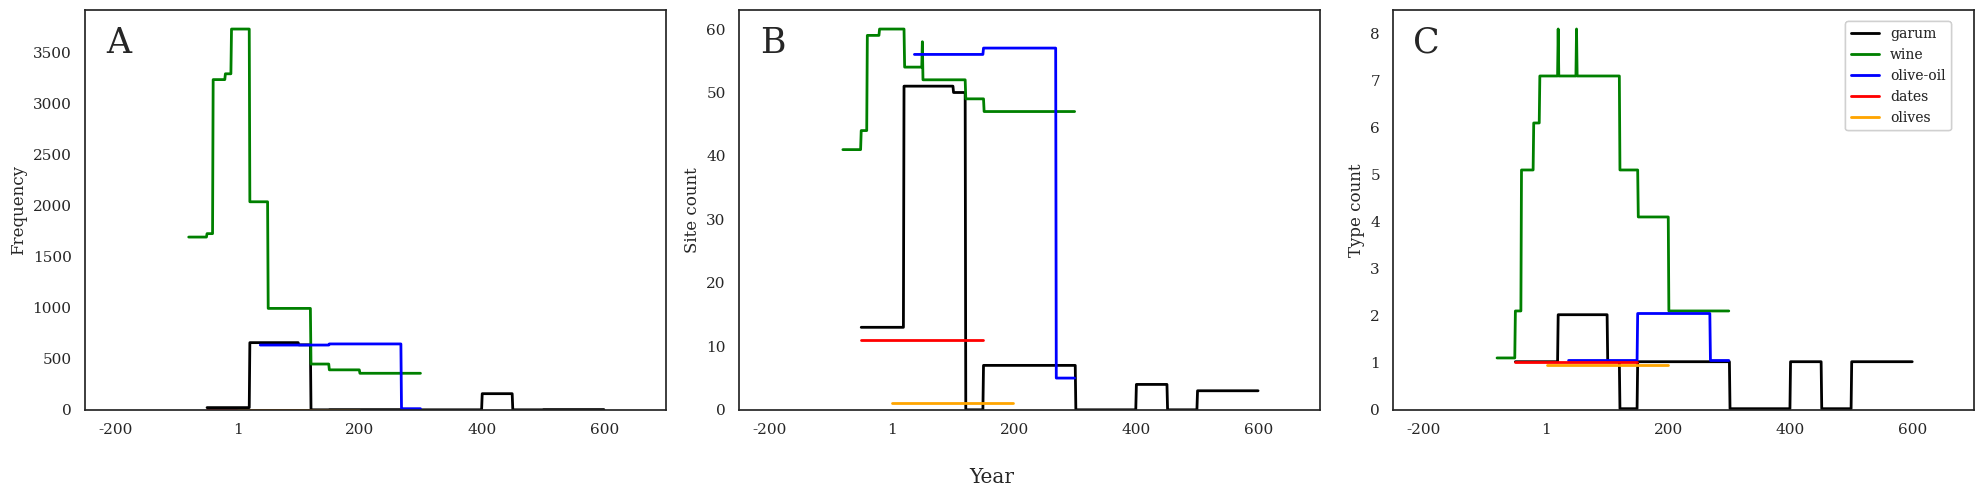

In [6]:
sns.set_style("white", {"font.family":"serif", "font.serif":"Times New Roman"}) 

fig, axs= plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

axs[0].set_xlim([-250, 700])
axs[1].set_xlim([-250, 700])
axs[2].set_xlim([-250, 700])


for ax, d in zip(axs.ravel(), list_of_dicts):

    ax_number = ax.get_subplotspec().num1
    if ax_number == 2:

        jitter_bound = calculate_jitter_bound(d)

        plot_graph_w_jitter(dict_w_series = d,
                            ax = ax,
                            jitter_bound = jitter_bound,
                            linewidth = 2)

    else:
        plot_graph(dict_w_series = d,
                   ax = ax,
                   linewidth = 2)
               
    ax.set_ylim(0, None)
    ax.yaxis.set_major_formatter(FormatStrFormatter("%.0f"))  
    ax.set_xlabel(None)
    ax.get_legend().remove()
    ax.set_ylabel(None)
    ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])
    handles, labels = ax.get_legend_handles_labels() 
    fig.legend(handles, labels, bbox_to_anchor=(0.983, 0.955), fontsize = 10)

axs[0].set_ylabel("Frequency")
axs[1].set_ylabel("Site count")
axs[2].set_ylabel("Type count")

for ax, label in zip(axs, ["A", "B", "C"]):
    ax.text(0.08, 0.96, label, transform=ax.transAxes,
            fontsize=25, va='top', ha='right')

fig.supxlabel("Year")

plt.tight_layout()
plt.savefig("../figs/Q4FR.png", bbox_inches="tight", format = "png", dpi = 400)